###  PART 2: - Python code for data Visualization

This notebook contains the python code for analyzing and visualizing data to gain insights, identify important patterns, and discover relationships among variables.

In [1]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the CSV file from the Part1 output into a DataFrame
csv_filename = 'Part1_Output.csv'
df = pd.read_csv(csv_filename)
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [2]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

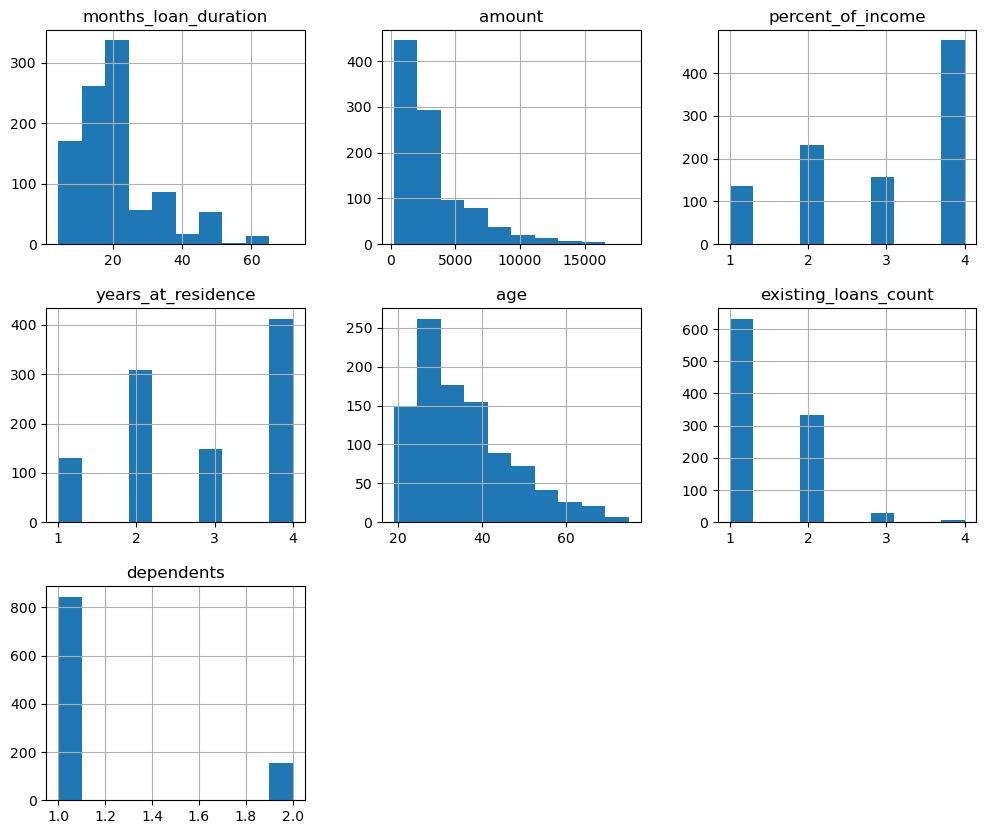

In [3]:
# Plotting Histograms for numerical columns. 
df.hist(figsize= (12,10))
plt.show()

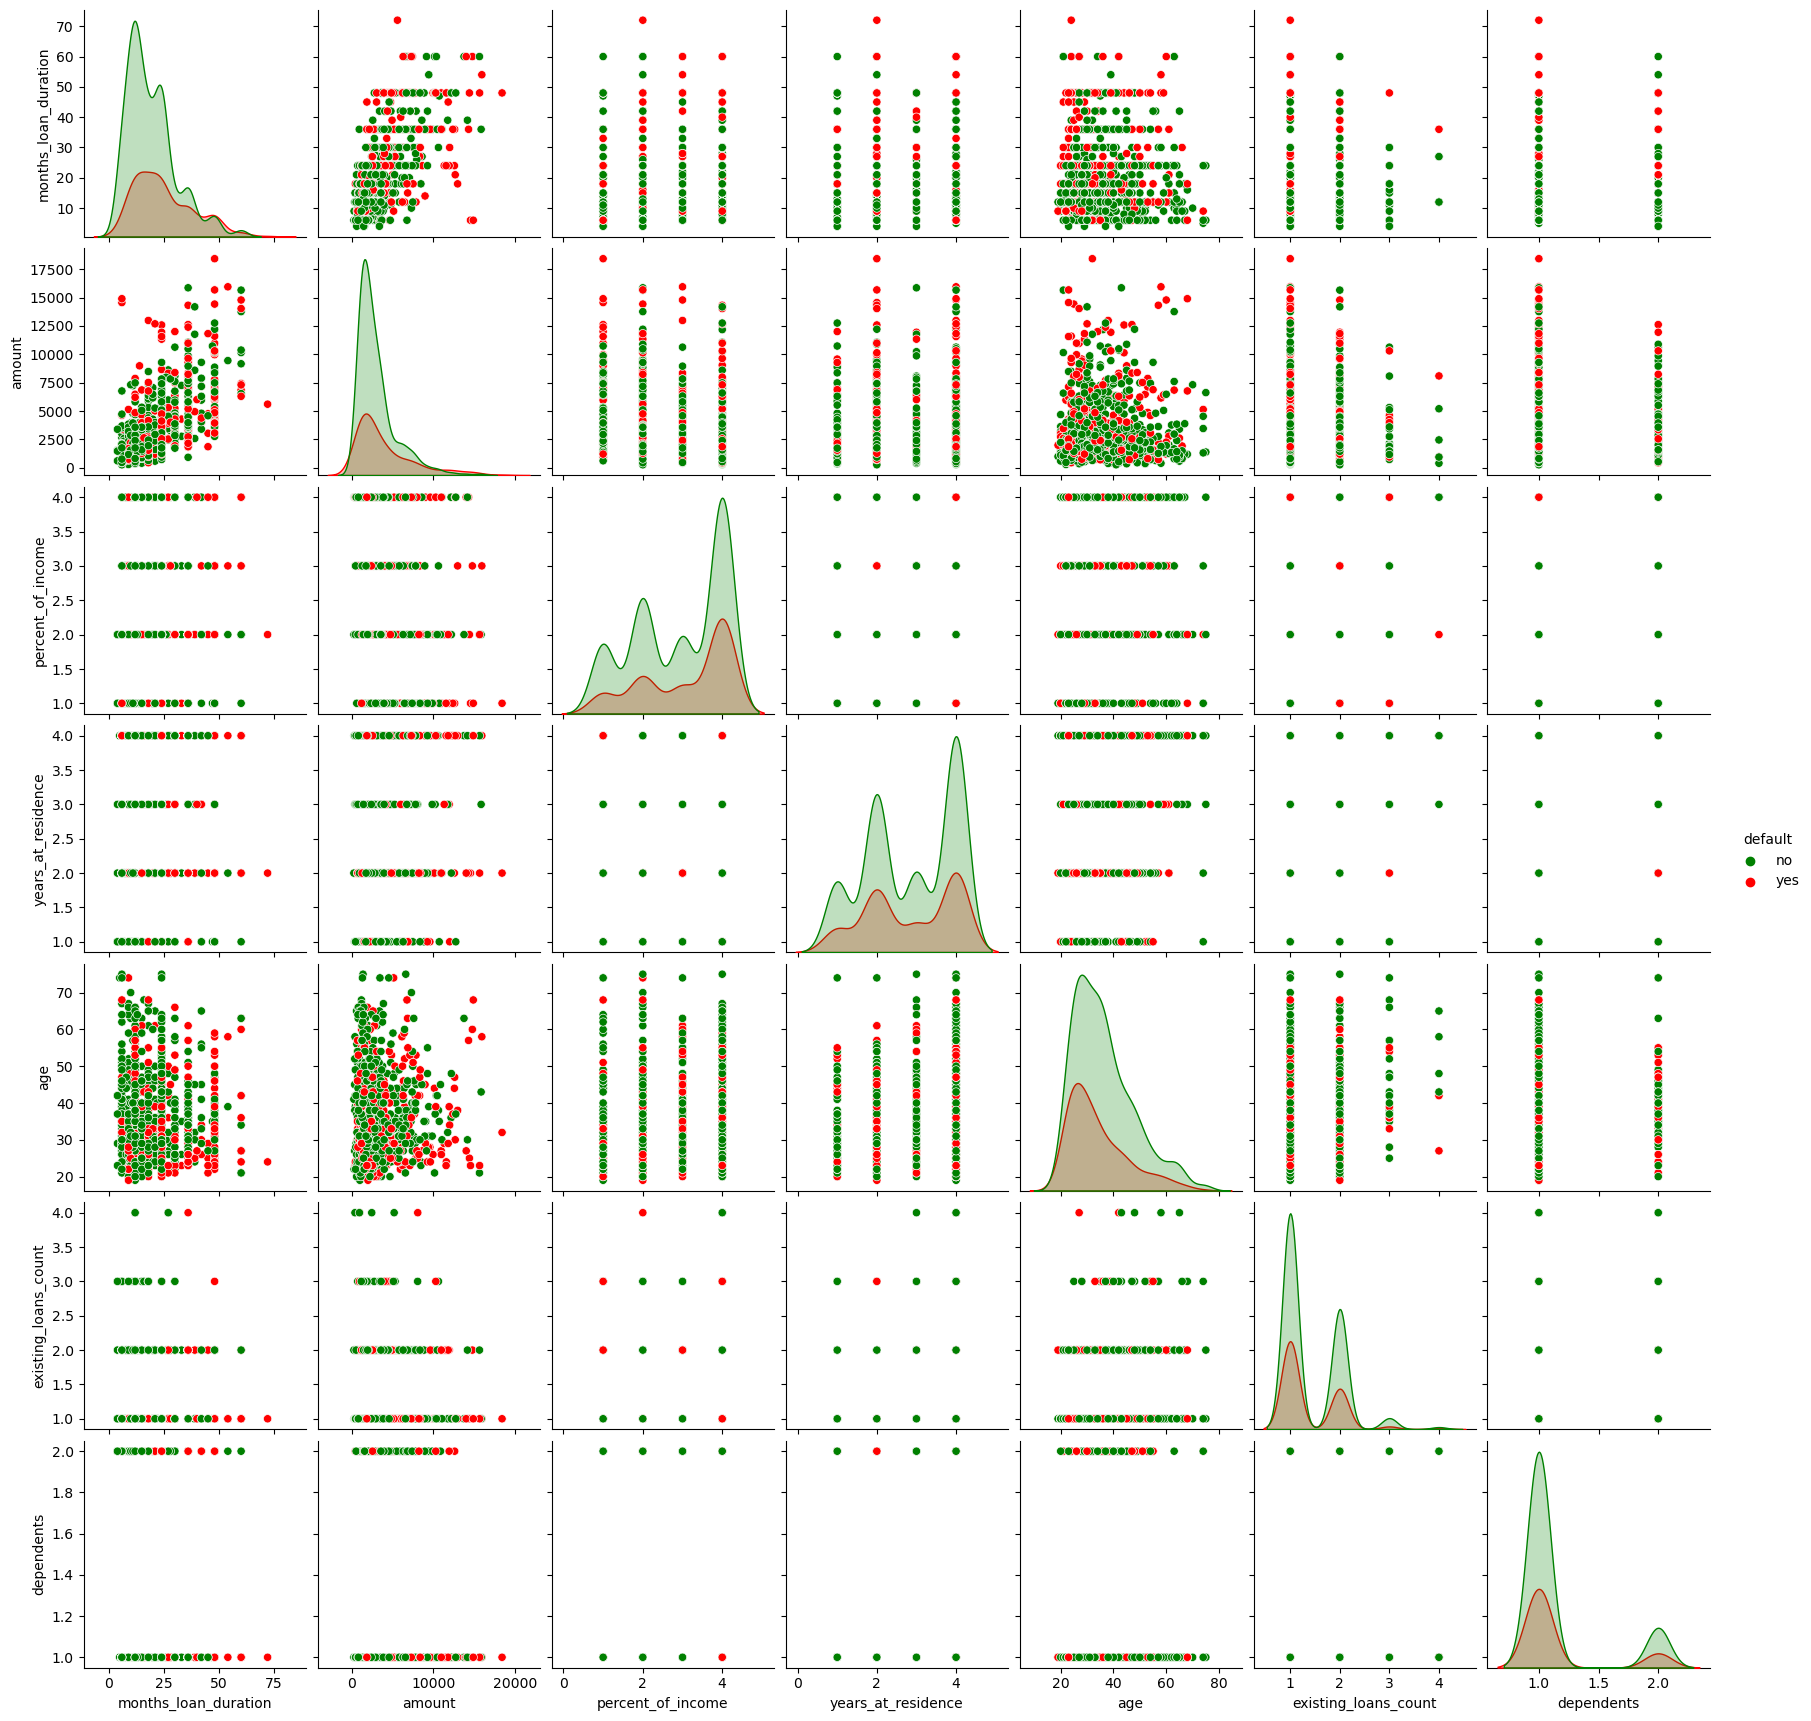

In [4]:
# Displaying the Pairplots for numerical variables with hue= 'default'
sns.pairplot(df, hue='default', kind = 'scatter',  palette={'yes': 'red', 'no': 'green'})
plt.show()

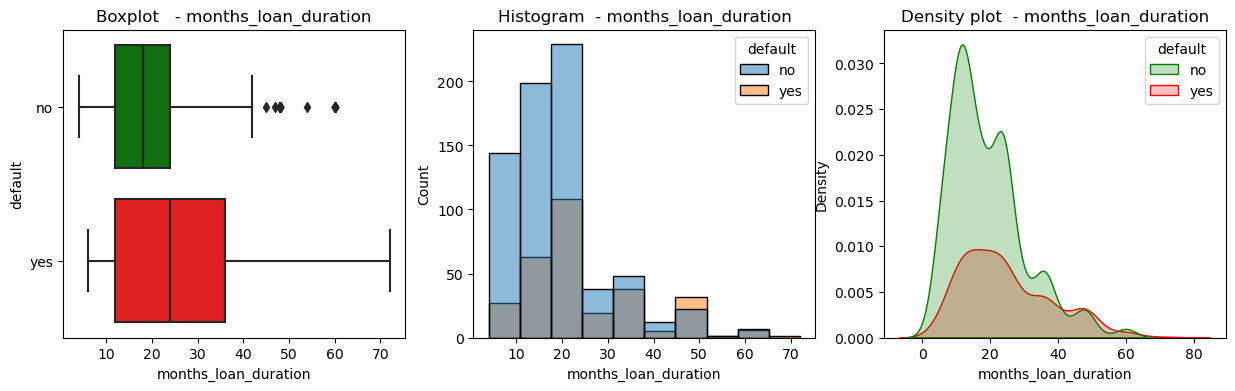

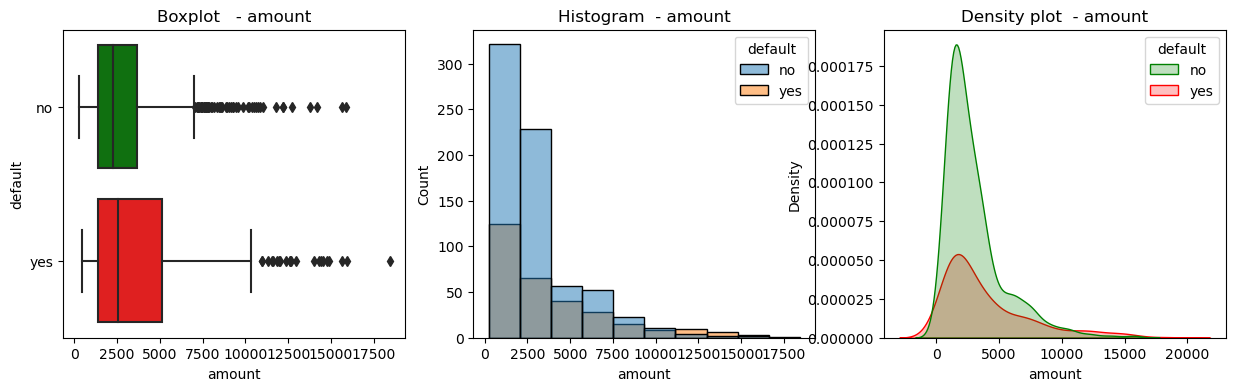

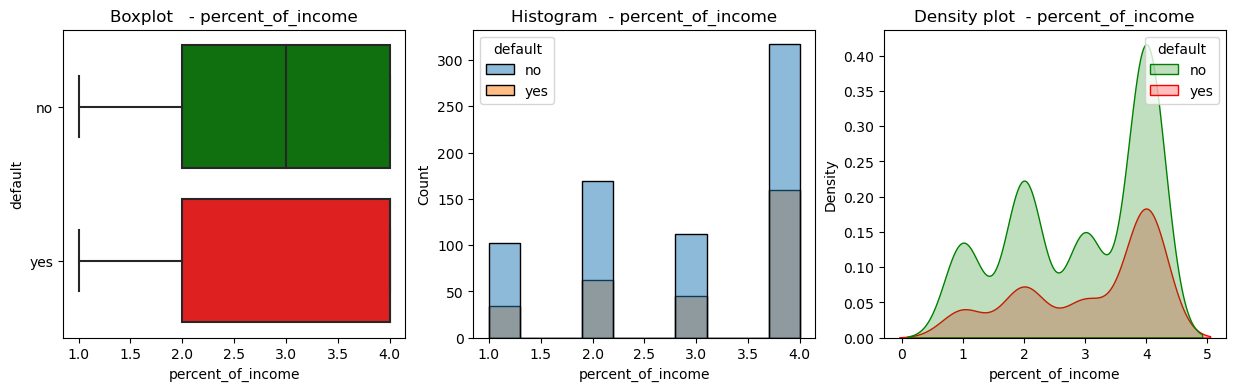

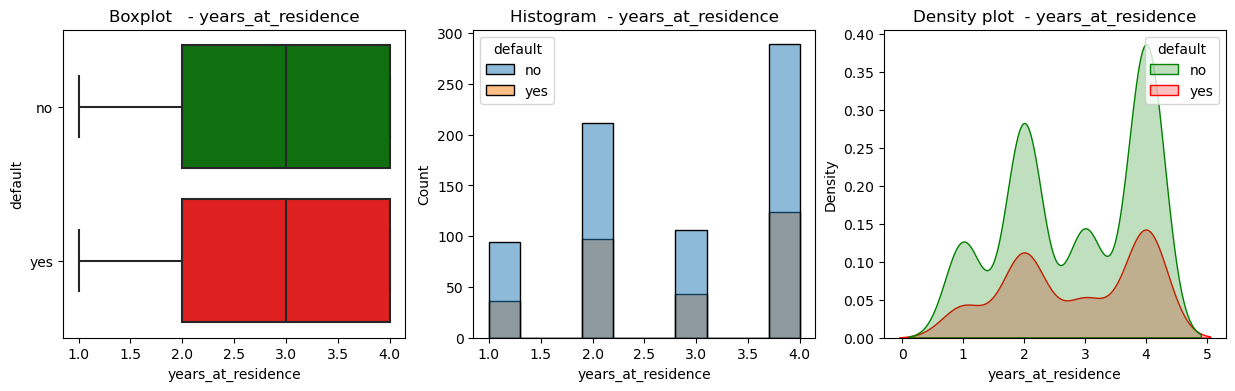

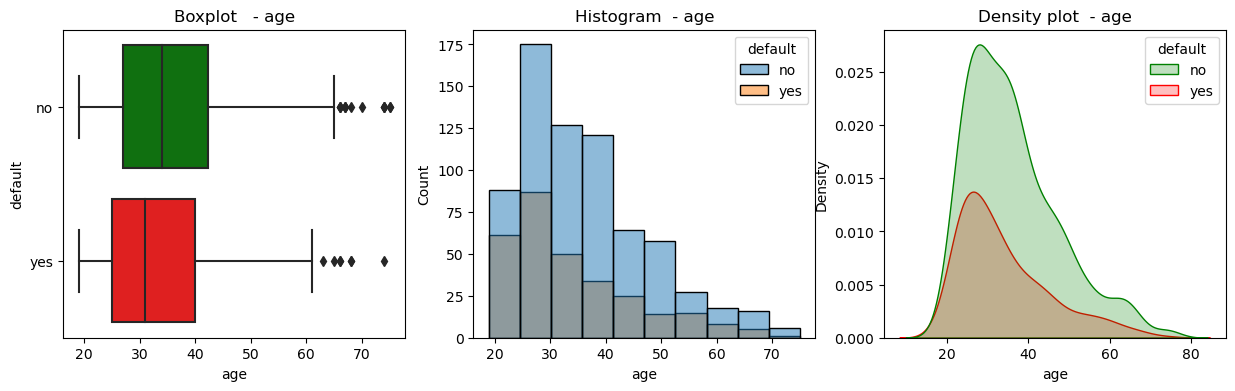

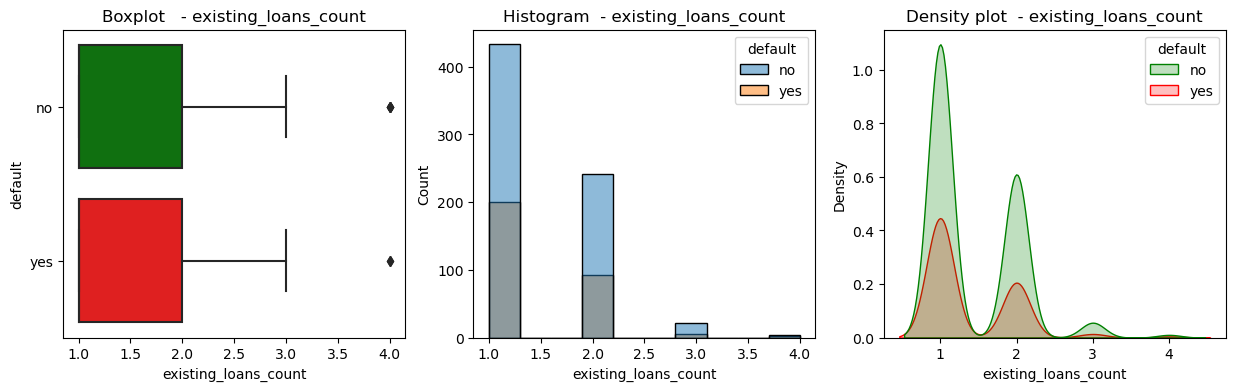

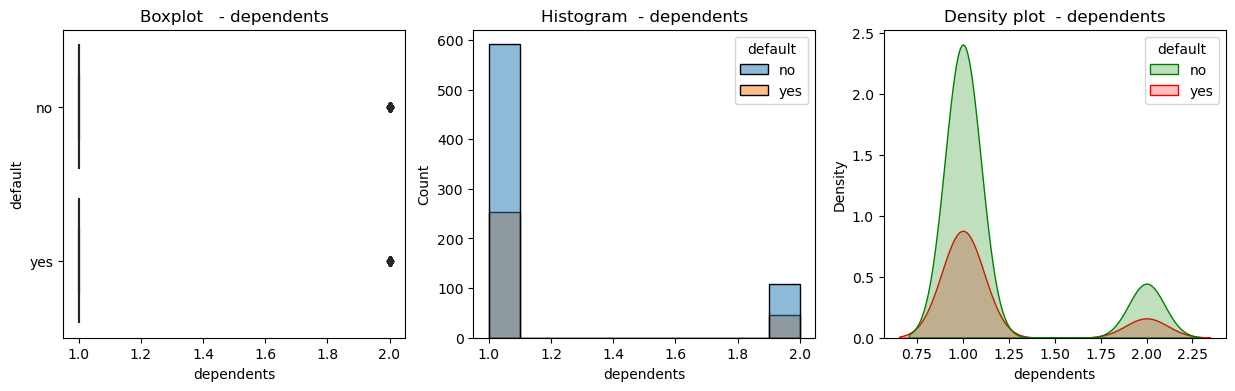

In [5]:

# Extracting numerical columns from the dataset.
numerical_columns = df.select_dtypes(include=['int64'])

# Displaying the follwing 3 plots : 
    # Boxplots with hue='default'
    # Density plot with hue='default'
    # Histogram with hue = 'default'
    
for numerical_variable in numerical_columns.columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Creating Boxplots with hue='default'
    sns.boxplot(data=df, x=numerical_variable, y='default', ax=ax1,
                palette={'yes': 'red', 'no': 'green'})
    ax1.set_title(f'Boxplot   - {numerical_variable}')

    # Creating Histograms with hue='default'    
    sns.histplot(data=df, x=numerical_variable, hue='default', ax=ax2, bins=10, kde=False)    ## added hue = default## bins 20 to 10
    ax2.set_title(f'Histogram  - {numerical_variable}')
   
    # Creating Kernel density chart with hue='default'
    sns.kdeplot(data=df, x=numerical_variable, hue='default', ax=ax3, fill=True,
                palette={'yes': 'red', 'no': 'green'})
    ax3.set_title(f'Density plot  - {numerical_variable}')
    plt.show()

In [6]:
# Calculating the correlation matrix 

# from the above Scatter Plots it is clear that relationship between variables is not linear.
# So, we will use 'Spearman' method of correlation.

correlation_matrix = numerical_columns.corr(method='spearman')
correlation_matrix

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
percent_of_income,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
years_at_residence,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_loans_count,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


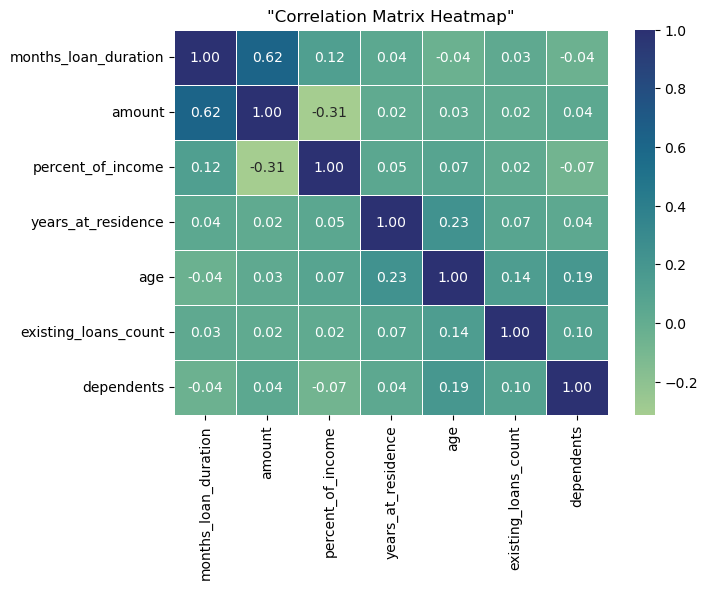

In [7]:
# Creating Heatmap of the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidth=.5)
plt.title('"Correlation Matrix Heatmap"')
plt.show()


#### Observations:  
1. From the heatmap it is clear that not many correlations are there. 
2. Only the positive correlation between 'amount' and 'months_loan_duration' is slightly significant. Other than this there is no significant correlation among variables. 


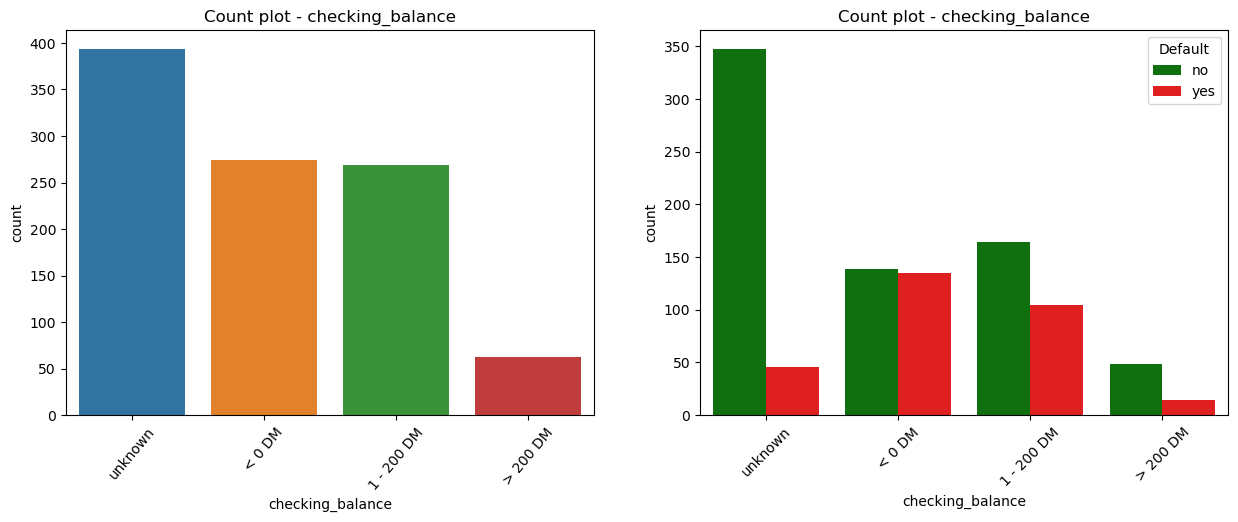

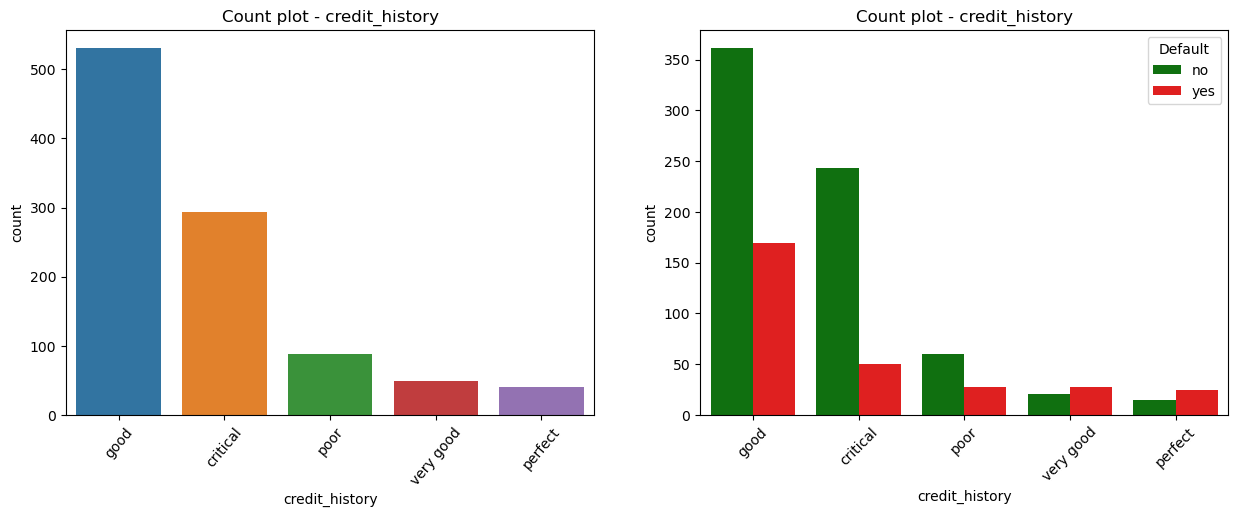

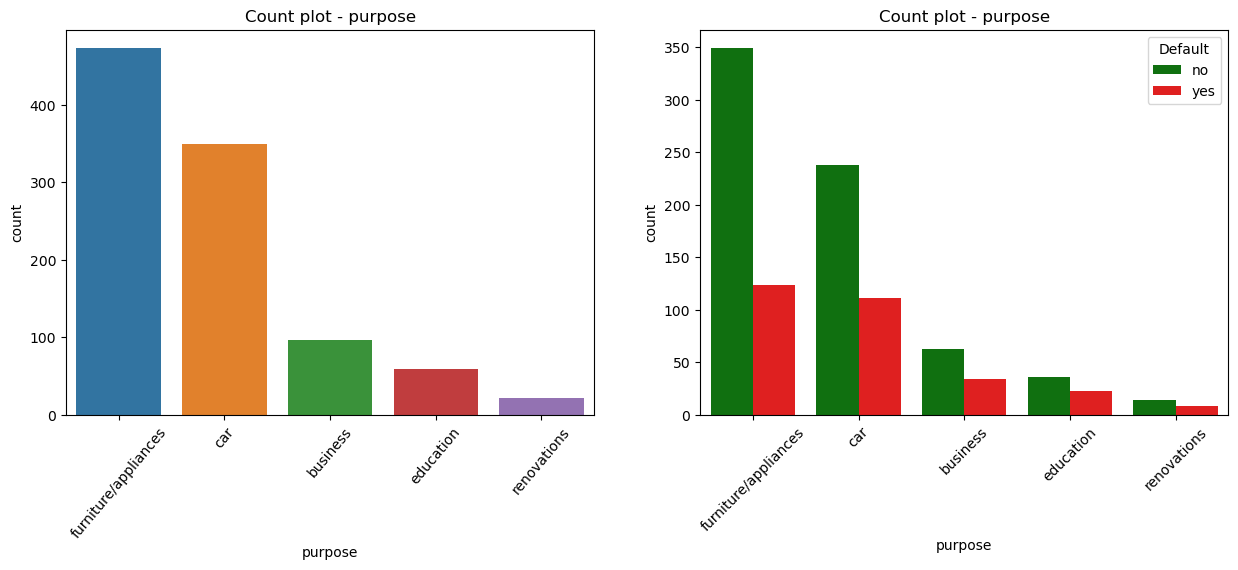

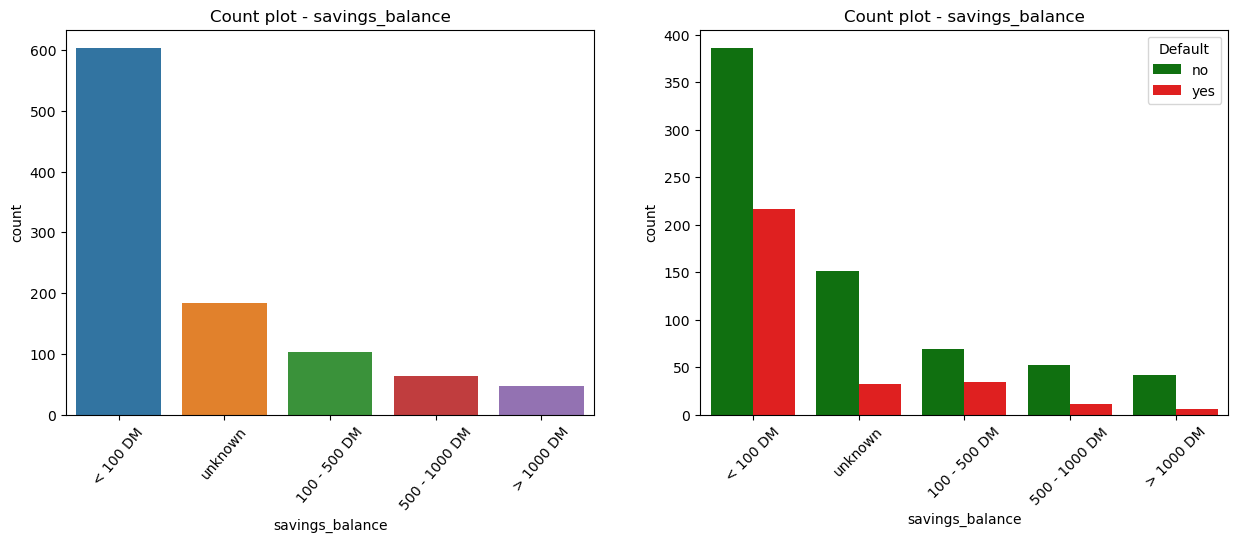

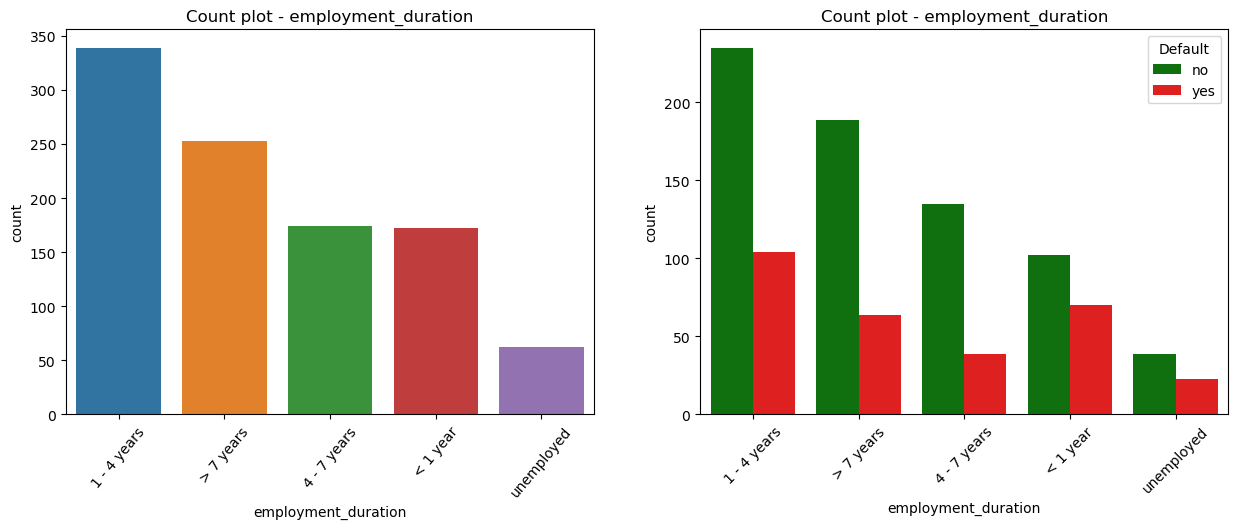

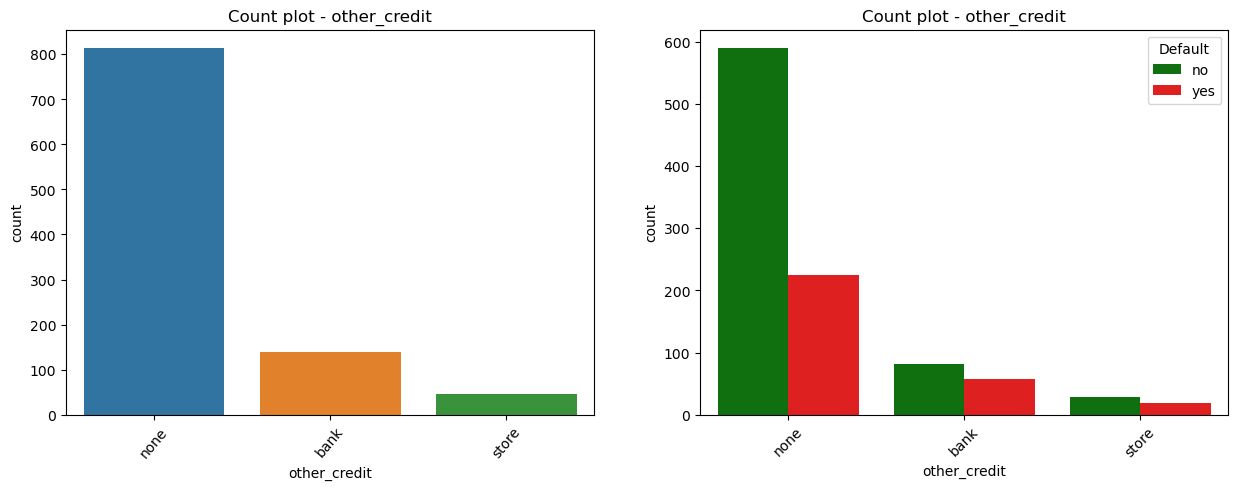

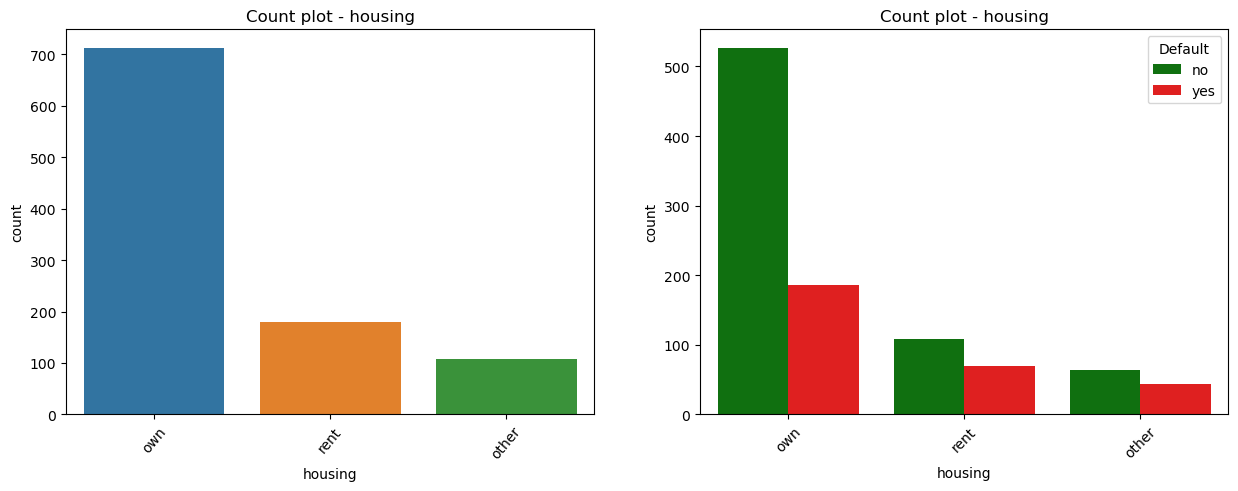

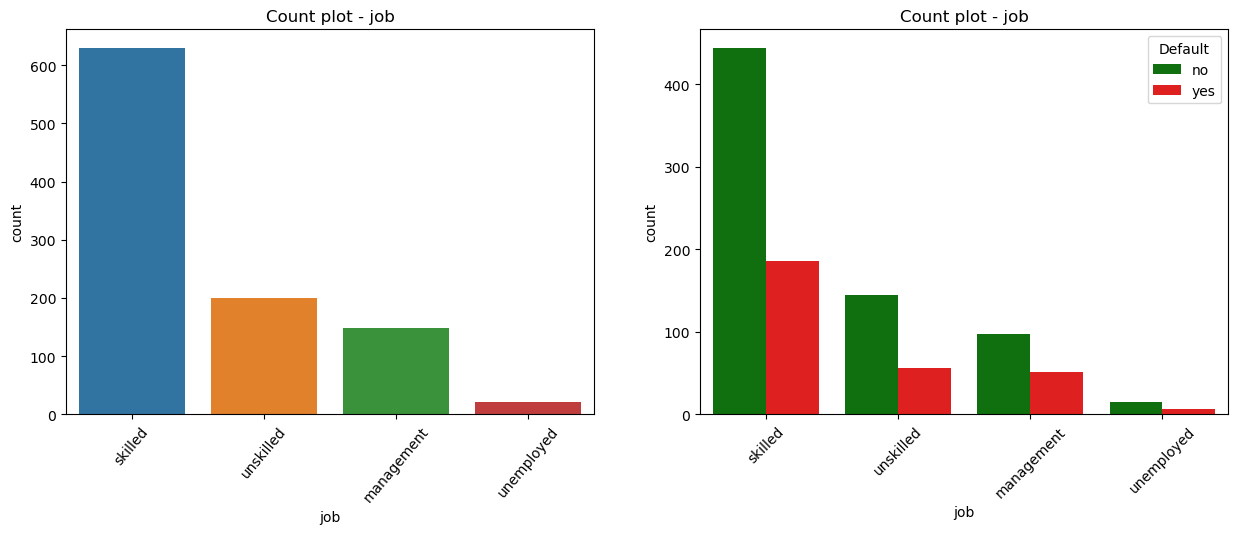

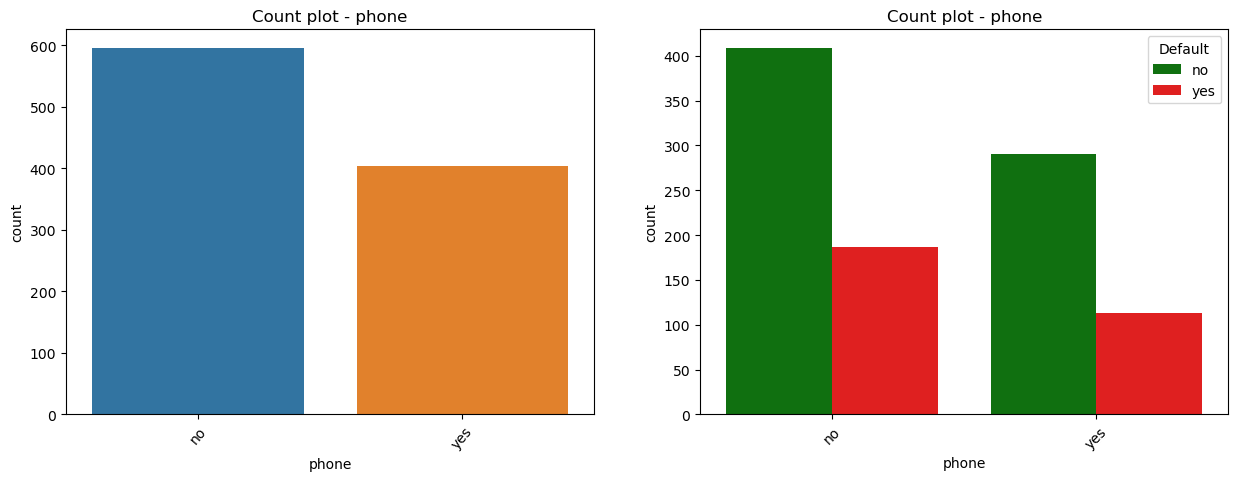

In [8]:
# Taking the categorical columns except the response column 'default'
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.drop(columns=['default'])

# Creating Countplots with and without 'default' as the hue for each categorical column. 
for categorical_variable in categorical_columns.columns:
    plt.figure(figsize=(15, 5))
    
    # Creating Count plot without hue='default'
    plt.subplot(1, 2, 1)  
    sns.countplot(data=df, x=categorical_variable,
                  order=df[categorical_variable].value_counts().index)
    plt.title(f'Count plot - {categorical_variable}')
    plt.xticks(rotation=50)
    
    # Creating Count plot with hue='default' 
    plt.subplot(1, 2, 2)  
    sns.countplot(data=df, x=categorical_variable, hue='default',
                  order=df[categorical_variable].value_counts().index,
                  palette={'yes': 'red', 'no': 'green'})
    plt.title(f'Count plot - {categorical_variable}')
    plt.xticks(rotation=45)
    plt.legend(title='Default', loc='upper right')
    plt.show()
